# ex7_pca.m

# ===== Part 1: Load Example Dataset  =====

In [77]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

**Principal Component Analysis**  
In this exercise, we will use principal component analysis (PCA) to perform dimensionality reduction. we will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

**Example Dataset**   
To help us understand how PCA works, we will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The cell below will plot the training data, also shown in here:

In this part of the exercise, we will visualize what happens when we use PCA to reduce the data from 2D to 1D. In practice, we might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

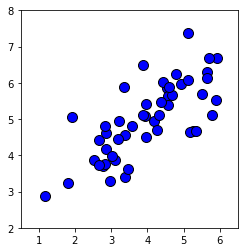

In [78]:
# Load the dataset into the variable X 
data = loadmat(os.path.join('Data', 'C:\\Users\\nomaniqbal\\Downloads\\notebook\\HomeworkMl\\mlclass-ex7-jin\\ex7data1.mat'))
X = data['X']

#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal')
plt.grid(False)

# ===== Part 2: Principal Component Analysis =====

**Implementing PCA**  
In this part of the exercise, we will implement PCA.  
PCA consists of two computational steps:  

Compute the covariance matrix of the data.
Use SVD (in python we use numpy's implementation np.linalg.svd) to compute the eigenvectors $U_1, U_2, U_n$ These will correspond to the principal components of variation in the data.
First, we should compute the covariance matrix of the data, which is given by:
$\Sigma = \frac{1}{m} X^T X$

where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator.

After computing the covariance matrix, we can run SVD on it to compute the principal components. In python and numpy (or scipy), we can run SVD with the following command: U, S, V = np.linalg.svd(Sigma), where U will contain the principal components and S will contain a diagonal matrix. Note that the scipy library also has a similar function to compute SVD scipy.linalg.svd. The functions in the two libraries use the same C-based library (LAPACK) for the SVD computation, but the scipy version provides more options and arguments to control SVD computation. In this exercise, we will stick with the numpy implementation of SVD.

Complete the code in the following cell to implemente PCA.

In [79]:
def pca(X):

    # Useful values
    m, n = X.shape

    # We need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    Sigma = (1 / m) * (X.T.dot(X))
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In the next cell, this normalization will be performed for us using the feature_normalization function. After normalizing the data, we can run PCA to compute the principal components. our task is to complete the code in the function pca to compute the principal components of the dataset.

The following cell will also output the top principal component (eigenvector) found, and we should expect to see an output of about [-0.707 -0.707]. (It is possible that numpy may instead output the negative of this, since U1 and -U1 are equally valid choices for the first principal component.)

In [80]:
def feature_normalization(X):

    standard_deviation = np.std(X, axis= 0)
    mean = np.mean(X, axis= 0)
    X_normalized = (X - mean)/ standard_deviation
    
    return X_normalized, mean, standard_deviation

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]


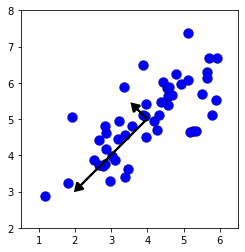

In [81]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = feature_normalization(X)

#  Run PCA
U, S = pca(X_norm)

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))

# ===== Part 3: Dimension Reduction =====

**Dimensionality Reduction with PCA**  
After computing the principal components, we can use them to reduce the feature dimension of our dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, we will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space. In practice, if we were using a learning algorithm such as linear regression or perhaps neural networks, we could now use the projected data instead of the original data. By using the projected data, we can train our model faster as there are less dimensions in the input.

**Projecting the data onto the principal components**  
we should now complete the code in the function project_data. Specifically, we are given a dataset X, the principal components U, and the desired number of dimensions to reduce to K. we should project each example in X onto the top K components in U. Note that the top K components in U are given by the first K columns of U, that is Ureduce = U[:, :K].

In [82]:
def project_data(X, U, K):

    # we need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    Z = np.dot(X,  U[:, :K])
    
    return Z

Once we have completed the code in project_data, the following cell will project the first example onto the first dimension and we should see a value of about 1.481 (or possibly -1.481, if we got -U1 instead of U).

In [83]:
#  Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))

Projection of the first example: 1.496313


**Reconstructing an approximation of the data**  
After projecting the data onto the lower dimensional space, we can approximately recover the data by projecting them back onto the original high dimensional space. Our task is to complete the function recover_data to project each example in Z back onto the original space and return the recovered approximation in Xrec.

In [84]:
def recover_data(Z, U, K):

    # We need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    X_rec = Z.dot(U[:, :K].T)

    return X_rec

Once we have completed the code in recover_data, a cell will recover an approximation of the first example and we should see a value of about [-1.047 -1.047]. The code will then plot the data in this reduced dimension space. This will show us what the data looks like when using only the corresponding eigenvectors to reconstruct it.

Approximation of the first example: [-1.058053 -1.058053]
       (this value should be about  [-1.047419 -1.047419])


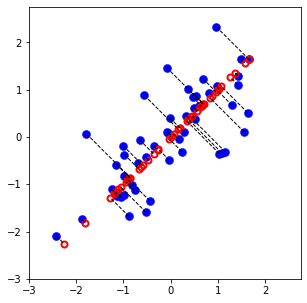

In [85]:
X_rec  = recover_data(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

# ===== Part 4: Loading and Visualizing Face Data =====

In this part of the exercise, we will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset X of face images, each  in grayscale. This dataset was based on a cropped version of the labeled faces in the wild dataset. Each row of X corresponds to one face image (a row vector of length 1024).

In [86]:
def display_data(X, example_width=None, figsize=(10, 10)):

    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

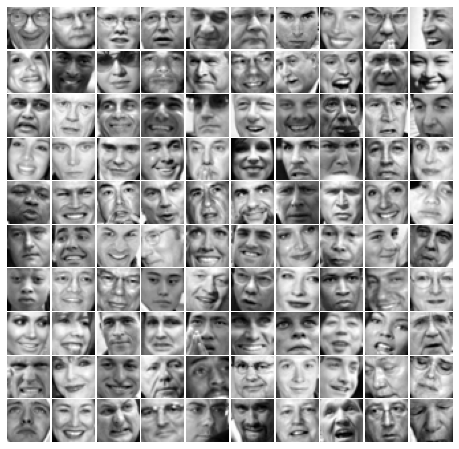

In [87]:
# Load Face dataset
data = loadmat("C:\\Users\\nomaniqbal\\Downloads\\notebook\\HomeworkMl\\mlclass-ex7-jin\\ex7faces.mat")
X = data['X']

#  Display the first 100 faces in the dataset
display_data(X[:100, :], figsize=(8, 8))

# ===== Part 5: PCA on Face Data: Eigenfaces =====

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix X. After running PCA, we will obtain the principal components of the dataset. Notice that each principal component in U (each column) is a vector of length  (where for the face dataset, n=1024 ). It turns out that we can visualize these principal components by reshaping each of them into a 32*32 matrix that corresponds to the pixels in the original dataset.

The following cell will first normalize the dataset for we and then run our PCA code. Then, the first 36 principal components (conveniently called eigenfaces) that describe the largest variations are displayed. If we want, we can also change the code to display more principal components to see how they capture more and more details.

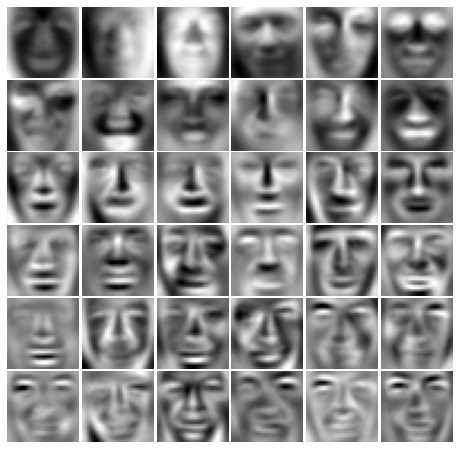

In [88]:
#  normalize X by subtracting the mean value from each feature
X_norm, mu, sigma = feature_normalization(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
display_data(U[:, :36].T, figsize=(8, 8))

# ===== Part 6: Dimension Reduction for Faces =====

Now that we have computed the principal components for the face dataset, we can use it to reduce the dimension of the face dataset. This allows us to use our learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up our learning algorithm.

The next cell will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$. To understand what is lost in the dimension reduction, we can recover the data using only the projected dataset.

In [89]:
#  Project images to the eigen space using the top k eigenvectors 
#  If we are applying a machine learning algorithm 
K = 100
Z = project_data(X_norm, U, K)

print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


**In the next cell, an approximate recovery of the data is performed and the original and projected face images are displayed**

From the reconstruction, we can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10x) in the dataset size that can help speed up our learning algorithm significantly. For example, if we were training a neural network to perform person recognition (given a face image, predict the identity of the person), we can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

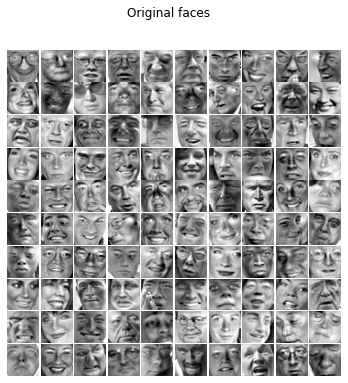

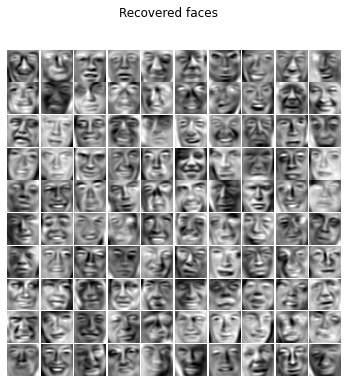

In [90]:
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed
K = 100
X_rec  = recover_data(Z, U, K)

# Display normalized data
display_data(X_norm[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
display_data(X_rec[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Recovered faces')
pass

# ===== Part 7: Visualization of Faces after PCA Dimension Reduction =====

In the earlier K-means image compression exercise, we used the K-means algorithm in the 3-dimensional RGB space. We reduced each pixel of the RGB image to be represented by 16 clusters.

In the next cell,we will apply our implementation of PCA to the 3-dimensional data to reduce it to 2 dimensions and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the “best” view.

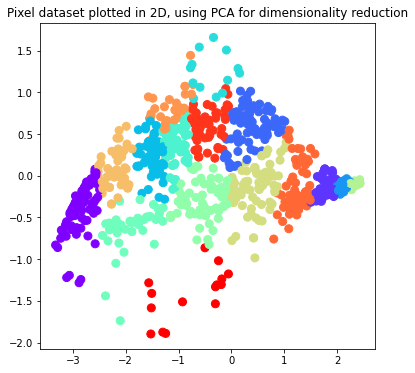

In [108]:
# Subtract the mean to use PCA
X_norm, mu, sigma = feature_normalization(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = project_data(X_norm, U, 2)

# Reset matplotlib to non-interactive
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(Z[sel, 0], Z[sel, 1], cmap='rainbow', c=idx[sel], s=64)
ax.set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
ax.grid(False)
pass